In [3]:
!pip install pycryptodome matplotlib


 CSE-478: SYMMETRIC & ASYMMETRIC CRYPTOGRAPHY PROGRAM

 AES ENCRYPTION/DECRYPTION
  1. AES Encrypt (ECB Mode)
  2. AES Decrypt (ECB Mode)
  3. AES Encrypt (CFB Mode)
  4. AES Decrypt (CFB Mode)

 RSA ENCRYPTION/DECRYPTION
  5. RSA Encrypt
  6. RSA Decrypt

 RSA SIGNATURE
  7. RSA Sign File
  8. RSA Verify Signature

 HASHING
  9. SHA-256 Hash File

 UTILITIES
 10. Generate All Keys
 11. Run Performance Test

  0. Exit

Enter your choice: 1
Enter key size (128 or 256): 128
Enter plaintext: mynameistowhidurrahmanasif

[+] AES-128 ECB Encryption completed
[+] Time taken: 0.000425 seconds
[+] Encrypted file: encrypted/aes_128_ecb.bin

 CSE-478: SYMMETRIC & ASYMMETRIC CRYPTOGRAPHY PROGRAM

 AES ENCRYPTION/DECRYPTION
  1. AES Encrypt (ECB Mode)
  2. AES Decrypt (ECB Mode)
  3. AES Encrypt (CFB Mode)
  4. AES Decrypt (CFB Mode)

 RSA ENCRYPTION/DECRYPTION
  5. RSA Encrypt
  6. RSA Decrypt

 RSA SIGNATURE
  7. RSA Sign File
  8. RSA Verify Signature

 HASHING
  9. SHA-256 Hash File

 UTILITIE

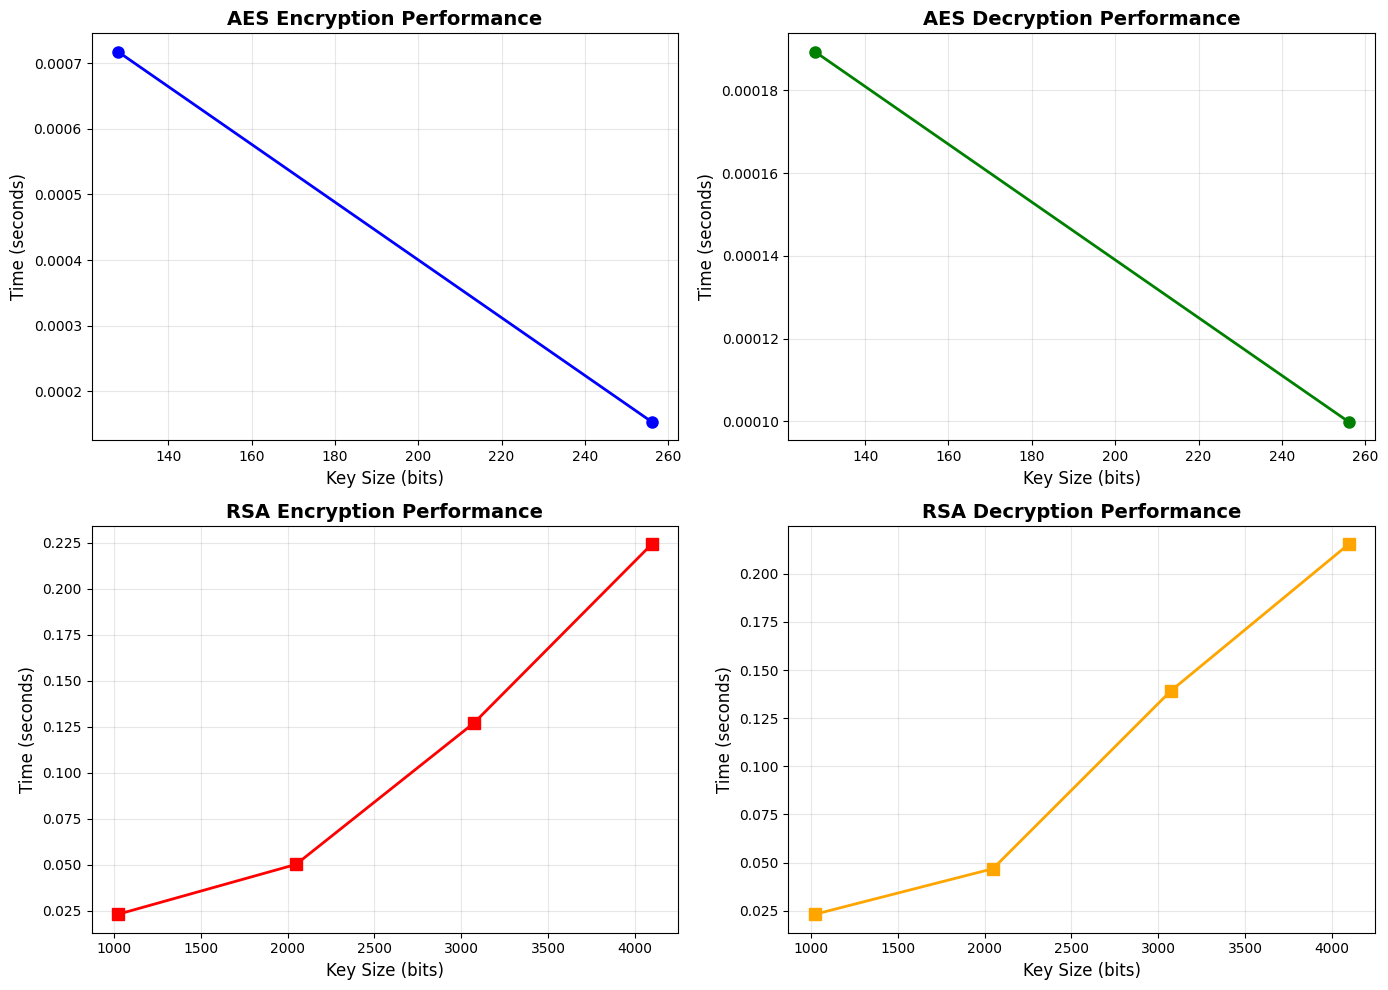


 CSE-478: SYMMETRIC & ASYMMETRIC CRYPTOGRAPHY PROGRAM

 AES ENCRYPTION/DECRYPTION
  1. AES Encrypt (ECB Mode)
  2. AES Decrypt (ECB Mode)
  3. AES Encrypt (CFB Mode)
  4. AES Decrypt (CFB Mode)

 RSA ENCRYPTION/DECRYPTION
  5. RSA Encrypt
  6. RSA Decrypt

 RSA SIGNATURE
  7. RSA Sign File
  8. RSA Verify Signature

 HASHING
  9. SHA-256 Hash File

 UTILITIES
 10. Generate All Keys
 11. Run Performance Test

  0. Exit


In [ ]:


"""
Programming Symmetric & Asymmetric Crypto-Lab Manual 4

"""

from Crypto.Cipher import AES
from Crypto.PublicKey import RSA
from Crypto.Signature import pkcs1_15
from Crypto.Hash import SHA256
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
from Crypto.Cipher import PKCS1_OAEP
import os
import time
import matplotlib.pyplot as plt

# =====================
# DIRECTORY MANAGEMENT
# =====================

def ensure_directories():
    """Create necessary directories"""
    os.makedirs("keys", exist_ok=True)
    os.makedirs("encrypted", exist_ok=True)
    os.makedirs("signatures", exist_ok=True)
    os.makedirs("data", exist_ok=True)

# =============
# AES FUNCTIONS
# =============

def generate_aes_key(key_size):
    """Generate and save AES key"""
    key = get_random_bytes(key_size // 8)
    filename = f"keys/aes_{key_size}.key"
    with open(filename, 'wb') as f:
        f.write(key)
    return key

def load_aes_key(key_size):
    """Load AES key from file"""
    filename = f"keys/aes_{key_size}.key"
    if not os.path.exists(filename):
        return generate_aes_key(key_size)
    with open(filename, 'rb') as f:
        return f.read()

def aes_encrypt_ecb(plaintext, key_size):
    """AES Encryption in ECB mode"""
    start_time = time.time()

    key = load_aes_key(key_size)
    cipher = AES.new(key, AES.MODE_ECB)
    padded_data = pad(plaintext.encode('utf-8'), AES.block_size)
    ciphertext = cipher.encrypt(padded_data)

    output_file = f"encrypted/aes_{key_size}_ecb.bin"
    with open(output_file, 'wb') as f:
        f.write(ciphertext)

    elapsed_time = time.time() - start_time
    print(f"\n[+] AES-{key_size} ECB Encryption completed")
    print(f"[+] Time taken: {elapsed_time:.6f} seconds")
    print(f"[+] Encrypted file: {output_file}")

    return elapsed_time

def aes_decrypt_ecb(key_size):
    """AES Decryption in ECB mode"""
    start_time = time.time()

    key = load_aes_key(key_size)
    cipher = AES.new(key, AES.MODE_ECB)

    input_file = f"encrypted/aes_{key_size}_ecb.bin"
    if not os.path.exists(input_file):
        print(f"[-] Error: Encrypted file not found: {input_file}")
        return 0

    with open(input_file, 'rb') as f:
        ciphertext = f.read()

    decrypted_padded = cipher.decrypt(ciphertext)
    plaintext = unpad(decrypted_padded, AES.block_size)

    elapsed_time = time.time() - start_time
    print(f"\n[+] AES-{key_size} ECB Decryption completed")
    print(f"[+] Time taken: {elapsed_time:.6f} seconds")
    print(f"[+] Decrypted text:\n{plaintext.decode('utf-8')}")

    return elapsed_time

def aes_encrypt_cfb(plaintext, key_size):
    """AES Encryption in CFB mode"""
    start_time = time.time()

    key = load_aes_key(key_size)
    iv = get_random_bytes(AES.block_size)
    cipher = AES.new(key, AES.MODE_CFB, iv)
    ciphertext = cipher.encrypt(plaintext.encode('utf-8'))

    output_file = f"encrypted/aes_{key_size}_cfb.bin"
    with open(output_file, 'wb') as f:
        f.write(iv + ciphertext)

    elapsed_time = time.time() - start_time
    print(f"\n[+] AES-{key_size} CFB Encryption completed")
    print(f"[+] Time taken: {elapsed_time:.6f} seconds")
    print(f"[+] Encrypted file: {output_file}")

    return elapsed_time

def aes_decrypt_cfb(key_size):
    """AES Decryption in CFB mode"""
    start_time = time.time()

    key = load_aes_key(key_size)

    input_file = f"encrypted/aes_{key_size}_cfb.bin"
    if not os.path.exists(input_file):
        print(f"[-] Error: Encrypted file not found: {input_file}")
        return 0

    with open(input_file, 'rb') as f:
        data = f.read()

    iv = data[:AES.block_size]
    ciphertext = data[AES.block_size:]

    cipher = AES.new(key, AES.MODE_CFB, iv)
    plaintext = cipher.decrypt(ciphertext)

    elapsed_time = time.time() - start_time
    print(f"\n[+] AES-{key_size} CFB Decryption completed")
    print(f"[+] Time taken: {elapsed_time:.6f} seconds")
    print(f"[+] Decrypted text:\n{plaintext.decode('utf-8')}")

    return elapsed_time

# ==============
# RSA FUNCTIONS
# ==============

def generate_rsa_keypair(key_size):
    """Generate and save RSA key pair"""
    key = RSA.generate(key_size)

    private_key_file = f"keys/rsa_{key_size}_private.pem"
    public_key_file = f"keys/rsa_{key_size}_public.pem"

    with open(private_key_file, 'wb') as f:
        f.write(key.export_key())

    with open(public_key_file, 'wb') as f:
        f.write(key.publickey().export_key())

    print(f"[+] RSA-{key_size} key pair generated and saved")
    return key

def load_rsa_keys(key_size):
    """Load RSA keys from files"""
    private_key_file = f"keys/rsa_{key_size}_private.pem"
    public_key_file = f"keys/rsa_{key_size}_public.pem"

    if not os.path.exists(private_key_file) or not os.path.exists(public_key_file):
        print(f"[+] Keys not found. Generating RSA-{key_size} keys...")
        key = generate_rsa_keypair(key_size)
        return key, key.publickey()

    with open(private_key_file, 'rb') as f:
        private_key = RSA.import_key(f.read())

    with open(public_key_file, 'rb') as f:
        public_key = RSA.import_key(f.read())

    return private_key, public_key

def rsa_encrypt(plaintext, key_size):
    """RSA Encryption"""
    start_time = time.time()

    _, public_key = load_rsa_keys(key_size)
    cipher = PKCS1_OAEP.new(public_key)
    ciphertext = cipher.encrypt(plaintext.encode('utf-8'))

    output_file = f"encrypted/rsa_{key_size}.bin"
    with open(output_file, 'wb') as f:
        f.write(ciphertext)

    elapsed_time = time.time() - start_time
    print(f"\n[+] RSA-{key_size} Encryption completed")
    print(f"[+] Time taken: {elapsed_time:.6f} seconds")
    print(f"[+] Encrypted file: {output_file}")

    return elapsed_time

def rsa_decrypt(key_size):
    """RSA Decryption"""
    start_time = time.time()

    private_key, _ = load_rsa_keys(key_size)

    input_file = f"encrypted/rsa_{key_size}.bin"
    if not os.path.exists(input_file):
        print(f"[-] Error: Encrypted file not found: {input_file}")
        return 0

    with open(input_file, 'rb') as f:
        ciphertext = f.read()

    cipher = PKCS1_OAEP.new(private_key)
    plaintext = cipher.decrypt(ciphertext)

    elapsed_time = time.time() - start_time
    print(f"\n[+] RSA-{key_size} Decryption completed")
    print(f"[+] Time taken: {elapsed_time:.6f} seconds")
    print(f"[+] Decrypted text:\n{plaintext.decode('utf-8')}")

    return elapsed_time

# =======================
# RSA SIGNATURE FUNCTIONS
# =======================

def rsa_sign_file(input_filename, key_size):
    """Generate RSA signature for a file"""
    start_time = time.time()

    if not os.path.exists(input_filename):
        print(f"[-] Error: File not found: {input_filename}")
        return 0

    private_key, _ = load_rsa_keys(key_size)

    with open(input_filename, 'rb') as f:
        data = f.read()

    hash_obj = SHA256.new(data)
    signature = pkcs1_15.new(private_key).sign(hash_obj)

    sig_file = f"signatures/signature_{key_size}.sig"
    with open(sig_file, 'wb') as f:
        f.write(signature)

    elapsed_time = time.time() - start_time
    print(f"\n[+] RSA-{key_size} Signature generated")
    print(f"[+] Time taken: {elapsed_time:.6f} seconds")
    print(f"[+] Signature file: {sig_file}")

    return elapsed_time

def rsa_verify_signature(input_filename, key_size):
    """Verify RSA signature"""
    start_time = time.time()

    if not os.path.exists(input_filename):
        print(f"[-] Error: File not found: {input_filename}")
        return 0

    _, public_key = load_rsa_keys(key_size)

    with open(input_filename, 'rb') as f:
        data = f.read()

    sig_file = f"signatures/signature_{key_size}.sig"
    if not os.path.exists(sig_file):
        print(f"[-] Error: Signature file not found: {sig_file}")
        return 0

    with open(sig_file, 'rb') as f:
        signature = f.read()

    hash_obj = SHA256.new(data)
    try:
        pkcs1_15.new(public_key).verify(hash_obj, signature)
        print(f"\n[+] Signature verification: VALID")
        result = True
    except (ValueError, TypeError):
        print(f"\n[-] Signature verification: INVALID")
        result = False

    elapsed_time = time.time() - start_time
    print(f"[+] Time taken: {elapsed_time:.6f} seconds")

    return elapsed_time

# =====================
# SHA-256 HASH FUNCTION
# =====================

def sha256_hash_file(filename):
    """Generate SHA-256 hash of a file"""
    start_time = time.time()

    if not os.path.exists(filename):
        print(f"[-] Error: File not found: {filename}")
        return 0

    with open(filename, 'rb') as f:
        data = f.read()

    hash_obj = SHA256.new(data)
    hash_value = hash_obj.hexdigest()

    elapsed_time = time.time() - start_time
    print(f"\n[+] SHA-256 Hash: {hash_value}")
    print(f"[+] Time taken: {elapsed_time:.6f} seconds")

    return elapsed_time

# ===================
# PERFORMANCE TESTING
# ===================

def performance_test_aes():
    """Test AES performance with different key sizes"""
    print("\n" + "="*70)
    print("AES PERFORMANCE TESTING")
    print("="*70)

    test_message = "This is a performance test message for AES encryption. " * 10
    key_sizes = [128, 256]
    encrypt_times = []
    decrypt_times = []

    for key_size in key_sizes:
        print(f"\n--- Testing AES-{key_size} ---")

        # Encryption
        enc_time = aes_encrypt_ecb(test_message, key_size)
        encrypt_times.append(enc_time)

        # Decryption
        dec_time = aes_decrypt_ecb(key_size)
        decrypt_times.append(dec_time)

    return key_sizes, encrypt_times, decrypt_times

def performance_test_rsa():
    """Test RSA performance with different key sizes"""
    print("\n" + "="*70)
    print("RSA PERFORMANCE TESTING")
    print("="*70)

    test_message = "Test message for RSA"
    key_sizes = [1024, 2048, 3072, 4096]
    encrypt_times = []
    decrypt_times = []

    for key_size in key_sizes:
        print(f"\n--- Testing RSA-{key_size} ---")

        # Encryption
        enc_time = rsa_encrypt(test_message, key_size)
        encrypt_times.append(enc_time)

        # Decryption
        dec_time = rsa_decrypt(key_size)
        decrypt_times.append(dec_time)

    return key_sizes, encrypt_times, decrypt_times

def plot_performance_graphs(aes_data, rsa_data):
    """Plot performance graphs"""
    aes_sizes, aes_enc, aes_dec = aes_data
    rsa_sizes, rsa_enc, rsa_dec = rsa_data

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # AES Encryption
    axes[0, 0].plot(aes_sizes, aes_enc, marker='o', linewidth=2, markersize=8, color='blue')
    axes[0, 0].set_xlabel('Key Size (bits)', fontsize=12)
    axes[0, 0].set_ylabel('Time (seconds)', fontsize=12)
    axes[0, 0].set_title('AES Encryption Performance', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)

    # AES Decryption
    axes[0, 1].plot(aes_sizes, aes_dec, marker='o', linewidth=2, markersize=8, color='green')
    axes[0, 1].set_xlabel('Key Size (bits)', fontsize=12)
    axes[0, 1].set_ylabel('Time (seconds)', fontsize=12)
    axes[0, 1].set_title('AES Decryption Performance', fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)

    # RSA Encryption
    axes[1, 0].plot(rsa_sizes, rsa_enc, marker='s', linewidth=2, markersize=8, color='red')
    axes[1, 0].set_xlabel('Key Size (bits)', fontsize=12)
    axes[1, 0].set_ylabel('Time (seconds)', fontsize=12)
    axes[1, 0].set_title('RSA Encryption Performance', fontsize=14, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)

    # RSA Decryption
    axes[1, 1].plot(rsa_sizes, rsa_dec, marker='s', linewidth=2, markersize=8, color='orange')
    axes[1, 1].set_xlabel('Key Size (bits)', fontsize=12)
    axes[1, 1].set_ylabel('Time (seconds)', fontsize=12)
    axes[1, 1].set_title('RSA Decryption Performance', fontsize=14, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('performance_analysis.png', dpi=300, bbox_inches='tight')
    print("\n[+] Performance graphs saved as 'performance_analysis.png'")
    plt.show()

def run_performance_test():
    """Run complete performance test"""
    aes_data = performance_test_aes()
    rsa_data = performance_test_rsa()
    plot_performance_graphs(aes_data, rsa_data)

# ==============
# KEY GENERATION
# ==============

def generate_all_keys():
    """Generate all required keys"""
    print("\n" + "="*70)
    print("GENERATING KEYS")
    print("="*70)

    # AES Keys (128 and 256 bits per lab manual)
    print("\n[+] Generating AES keys...")
    for key_size in [128, 256]:
        generate_aes_key(key_size)
        print(f"    - AES-{key_size} key generated and saved")

    # RSA Keys
    print("\n[+] Generating RSA keys...")
    for key_size in [1024, 2048, 3072, 4096]:
        generate_rsa_keypair(key_size)

    print("\n[+] All keys generated successfully!")

# =========
# MAIN MENU
# =========

def display_menu():
    """Display main menu"""
    print("\n" + "="*70)
    print(" CSE-478: SYMMETRIC & ASYMMETRIC CRYPTOGRAPHY PROGRAM")
    print("="*70)
    print("\n AES ENCRYPTION/DECRYPTION")
    print("  1. AES Encrypt (ECB Mode)")
    print("  2. AES Decrypt (ECB Mode)")
    print("  3. AES Encrypt (CFB Mode)")
    print("  4. AES Decrypt (CFB Mode)")
    print("\n RSA ENCRYPTION/DECRYPTION")
    print("  5. RSA Encrypt")
    print("  6. RSA Decrypt")
    print("\n RSA SIGNATURE")
    print("  7. RSA Sign File")
    print("  8. RSA Verify Signature")
    print("\n HASHING")
    print("  9. SHA-256 Hash File")
    print("\n UTILITIES")
    print(" 10. Generate All Keys")
    print(" 11. Run Performance Test")
    print("\n  0. Exit")
    print("="*70)

def main():
    """Main program"""
    ensure_directories()

    while True:
        display_menu()
        choice = input("\nEnter your choice: ").strip()

        if choice == '1':
            key_size = int(input("Enter key size (128 or 256): "))
            if key_size not in [128, 256]:
                print("[-] Invalid key size. Must be 128 or 256.")
                continue
            plaintext = input("Enter plaintext: ")
            aes_encrypt_ecb(plaintext, key_size)

        elif choice == '2':
            key_size = int(input("Enter key size (128 or 256): "))
            if key_size not in [128, 256]:
                print("[-] Invalid key size. Must be 128 or 256.")
                continue
            aes_decrypt_ecb(key_size)

        elif choice == '3':
            key_size = int(input("Enter key size (128 or 256): "))
            if key_size not in [128, 256]:
                print("[-] Invalid key size. Must be 128 or 256.")
                continue
            plaintext = input("Enter plaintext: ")
            aes_encrypt_cfb(plaintext, key_size)

        elif choice == '4':
            key_size = int(input("Enter key size (128 or 256): "))
            if key_size not in [128, 256]:
                print("[-] Invalid key size. Must be 128 or 256.")
                continue
            aes_decrypt_cfb(key_size)

        elif choice == '5':
            key_size = int(input("Enter RSA key size (1024, 2048, 3072, 4096): "))
            plaintext = input("Enter plaintext (short message): ")
            rsa_encrypt(plaintext, key_size)

        elif choice == '6':
            key_size = int(input("Enter RSA key size (1024, 2048, 3072, 4096): "))
            rsa_decrypt(key_size)

        elif choice == '7':
            filename = input("Enter filename to sign: ")
            key_size = int(input("Enter RSA key size (1024, 2048, 3072, 4096): "))
            rsa_sign_file(filename, key_size)

        elif choice == '8':
            filename = input("Enter filename to verify: ")
            key_size = int(input("Enter RSA key size (1024, 2048, 3072, 4096): "))
            rsa_verify_signature(filename, key_size)

        elif choice == '9':
            filename = input("Enter filename to hash: ")
            sha256_hash_file(filename)

        elif choice == '10':
            generate_all_keys()

        elif choice == '11':
            run_performance_test()

        elif choice == '0':
            print("\n[+] Exiting program. Goodbye!")
            break

        else:
            print("\n[-] Invalid choice. Please try again.")

if __name__ == "__main__":
    main()